# Imbalanced data

Imbalanced data refers to a situation in classification problems where the classes are not represented equally in the dataset.

One class (the majority class) has significantly more instances than one or more other classes (the minority class or classes). 

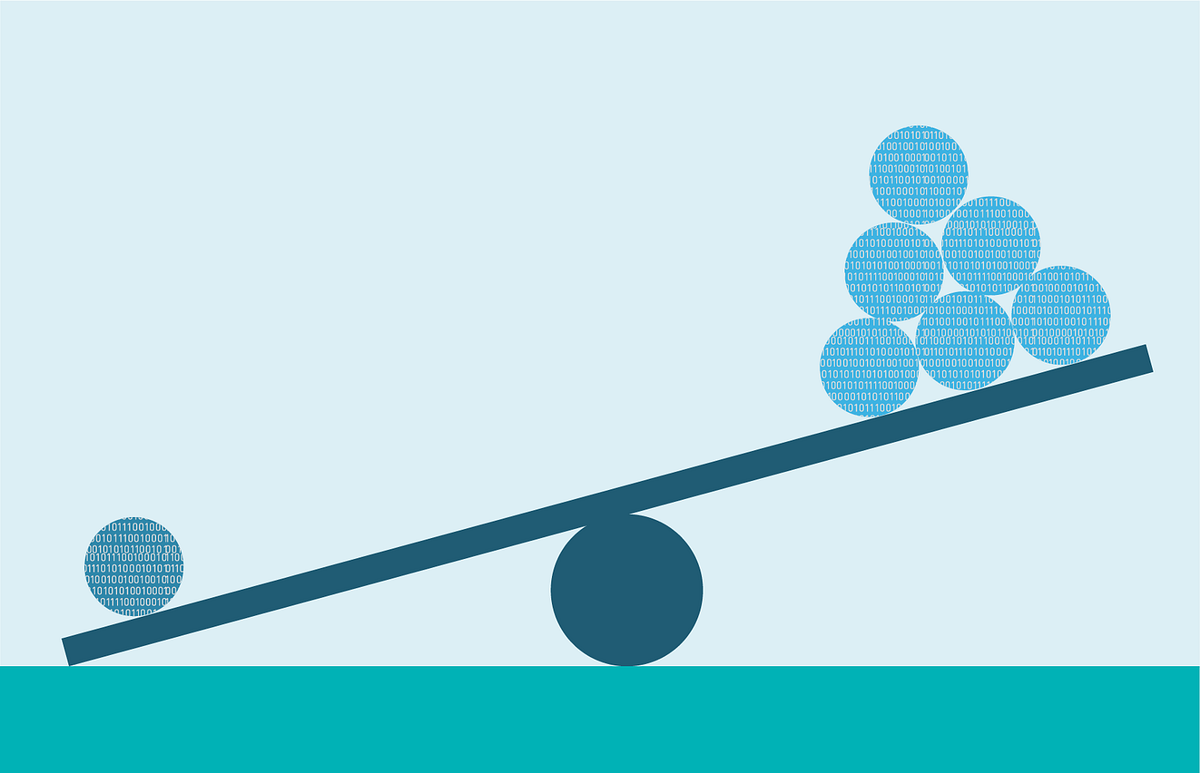

Imbalanced datasets are common in various real-world scenarios, such as fraud detection, medical diagnosis, anomaly detection, and text classification.

### Problems with Imbalanced Datasets:

* **Biased Model Performance**: Models trained on imbalanced data tend to be biased towards the majority class, as they tend to focus more on the majority class during training, resulting in poor generalization to the minority class.

* **Misleading Evaluation Metrics**: Traditional evaluation metrics like **accuracy** can be misleading on imbalanced datasets. A model may achieve high accuracy by simply predicting the majority class most of the time, while completely ignoring the minority class.

In [30]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

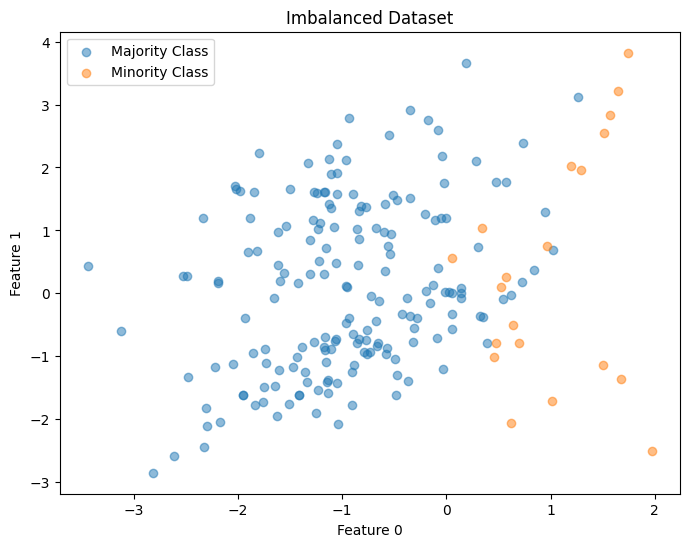

In [31]:
# Define parameters
num_samples = 200
num_features = 2
num_informative = 2  # Number of informative features
num_redundant = 0    # Number of redundant features
num_repeated = 0     # Number of repeated features

# Generate imbalanced dataset
input_, target_ = make_classification(n_samples=num_samples, n_features=num_features, n_classes=2,
                           n_informative=num_informative, n_redundant=num_redundant, n_repeated=num_repeated,
                           weights=[0.9, 0.1], random_state=0)

# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(input_[target_ == 0][:, 0], input_[target_ == 0][:, 1], label='Majority Class', alpha=0.5)
plt.scatter(input_[target_ == 1][:, 0], input_[target_ == 1][:, 1], label='Minority Class', alpha=0.5)
plt.title('Imbalanced Dataset')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend()
plt.show()

In [32]:
from sklearn.linear_model import LogisticRegression

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        50
           1       1.00      0.40      0.57        10

    accuracy                           0.90        60
   macro avg       0.95      0.70      0.76        60
weighted avg       0.91      0.90      0.88        60

ROC AUC Score: 0.992


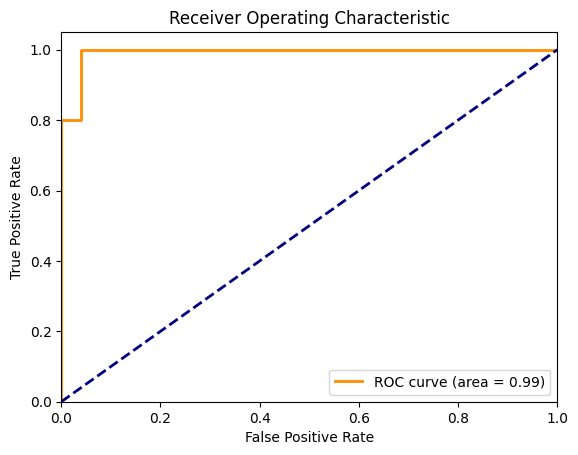

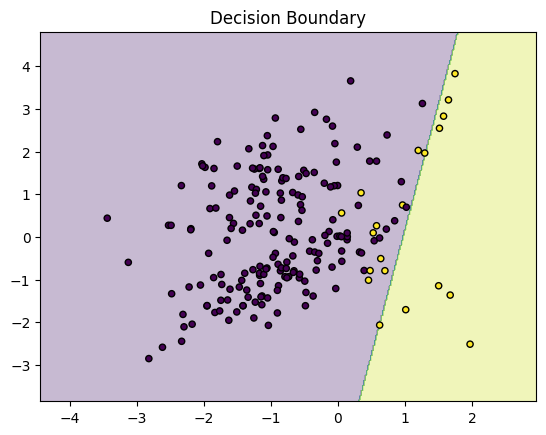

In [42]:
# Split dataset into training and testing sets
train_input, test_input, train_target, test_target = train_test_split(input_, target_, test_size = 0.3, random_state = 42)

# Initialize and train RandomForest classifier
classifier = LogisticRegression()
classifier.fit(train_input, train_target)

# Predict test set
y_pred = classifier.predict(test_input)
y_proba = classifier.predict_proba(test_input)[:, 1]

# Print classification report
print("Classification Report:")
print(classification_report(test_target, y_pred))

# Print ROC AUC Score
print("ROC AUC Score:", roc_auc_score(test_target, y_proba))

# Plotting ROC AUC Curve
def roc_auc_curve(test_target, y_prob):
    fpr, tpr, _ = roc_curve(test_target, y_prob)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(test_target, y_proba))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

roc_auc_curve(test_target, y_proba)

# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20)
    plt.title("Decision Boundary")
    plt.show()

# Plot decision boundary
plot_decision_boundaries(input_, target_, classifier)

## Solutions to Imbalanced Data Problems:

### **1. Resampling Techniques**:

## 1.1 Under-Sampling

Reduce the number of instances in the majority class by randomly removing instances.

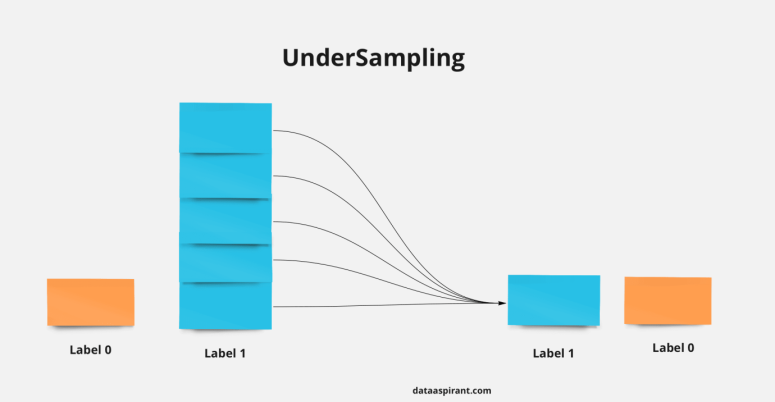

In [37]:
from imblearn.under_sampling import RandomUnderSampler

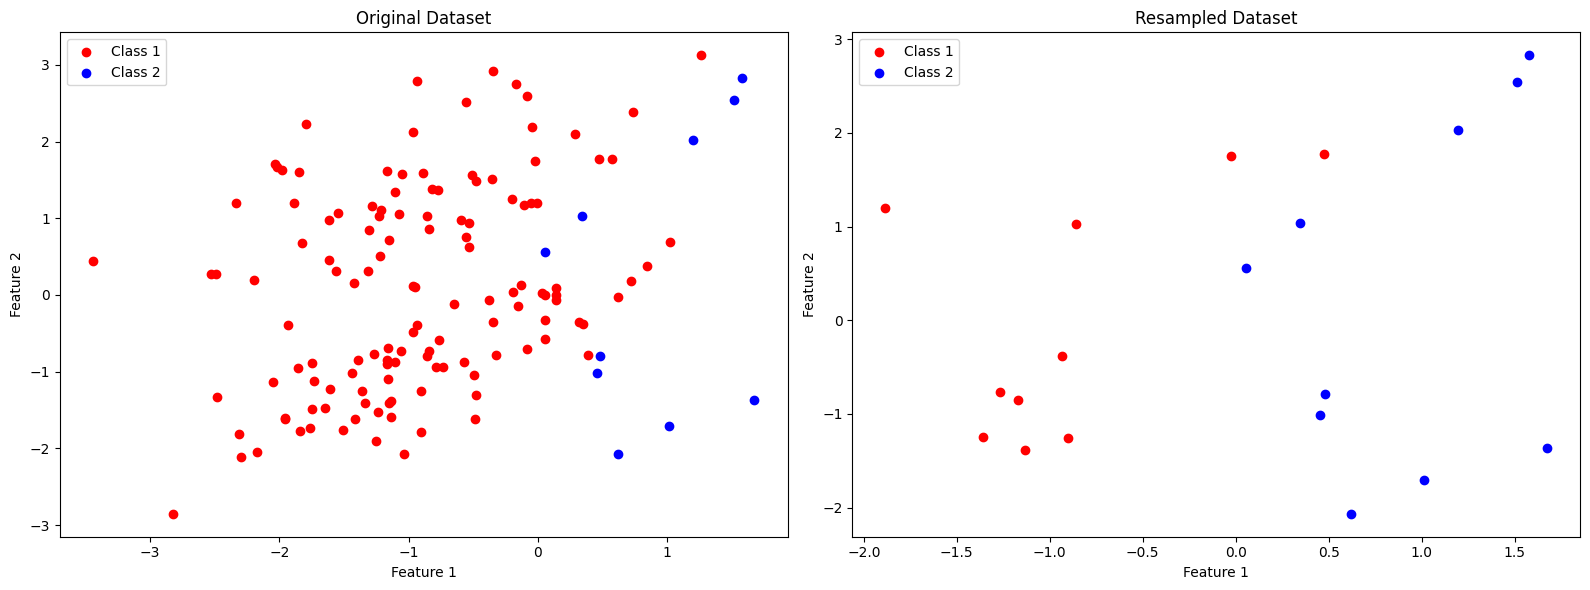

In [62]:
# Split dataset into training and testing sets
train_input, test_input, train_target, test_target = train_test_split(input_, target_, test_size = 0.3, random_state = 42)

# Applying Random Under Sampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(train_input, train_target)

# Plotting both figures side by side using subplots
plt.figure(figsize=(16, 6))

# Plotting the original dataset
plt.subplot(1, 2, 1)  # 1 row, 2 columns, position 1
plt.scatter(train_input[train_target == 0][:, 0], train_input[train_target == 0][:, 1], color='red', label='Class 1')
plt.scatter(train_input[train_target == 1][:, 0], train_input[train_target == 1][:, 1], color='blue', label='Class 2')
plt.title('Original Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Plotting the resampled dataset
plt.subplot(1, 2, 2)  # 1 row, 2 columns, position 2
plt.scatter(X_resampled[y_resampled == 0][:, 0], X_resampled[y_resampled == 0][:, 1], color='red', label='Class 1')
plt.scatter(X_resampled[y_resampled == 1][:, 0], X_resampled[y_resampled == 1][:, 1], color='blue', label='Class 2')
plt.title('Resampled Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

Classification Report (With Under-Sampling):
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        50
           1       0.67      1.00      0.80        10

    accuracy                           0.92        60
   macro avg       0.83      0.95      0.87        60
weighted avg       0.94      0.92      0.92        60

ROC AUC Score (With Under-Sampling): 0.99


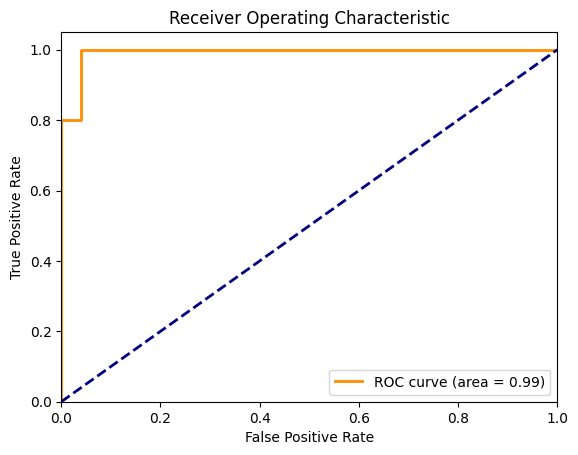

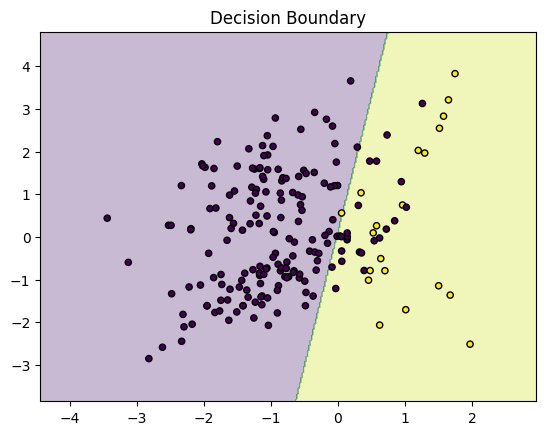

In [63]:
# Initialize and train RandomForest classifier on resampled data
classifier_rus = LogisticRegression()
classifier_rus.fit(X_resampled, y_resampled)

# Predict test set
y_pred_rus = classifier_rus.predict(test_input)
y_proba_rus = classifier_rus.predict_proba(test_input)[:, 1]

# Print classification report for resampled data
print("Classification Report (With Under-Sampling):")
print(classification_report(test_target, y_pred_rus))

# Print ROC AUC Score for resampled data
print("ROC AUC Score (With Under-Sampling):", roc_auc_score(test_target, y_proba_rus))

# Plotting ROC AUC Curve
roc_auc_curve(test_target, y_proba)

# Plot decision boundary
plot_decision_boundaries(input_, target_, classifier_rus)

**Advantages**: 
* Reduces computation time and memory usage. 
* Helps balance class distribution, potentially improving model performance.

**Disadvantages**: 
* May discard potentially useful information from majority class. 
* Risk of underfitting if important samples are removed.

## 1.2. Over-Sampling

Increase the number of instances in the minority class by duplicating existing instances or generating synthetic samples.

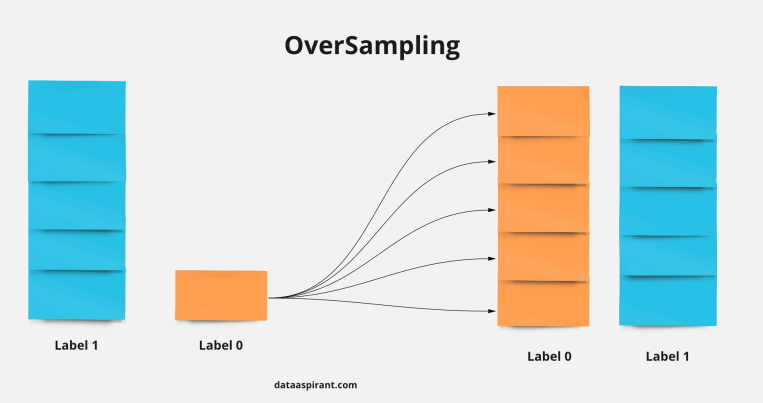

In [47]:
from imblearn.over_sampling import RandomOverSampler

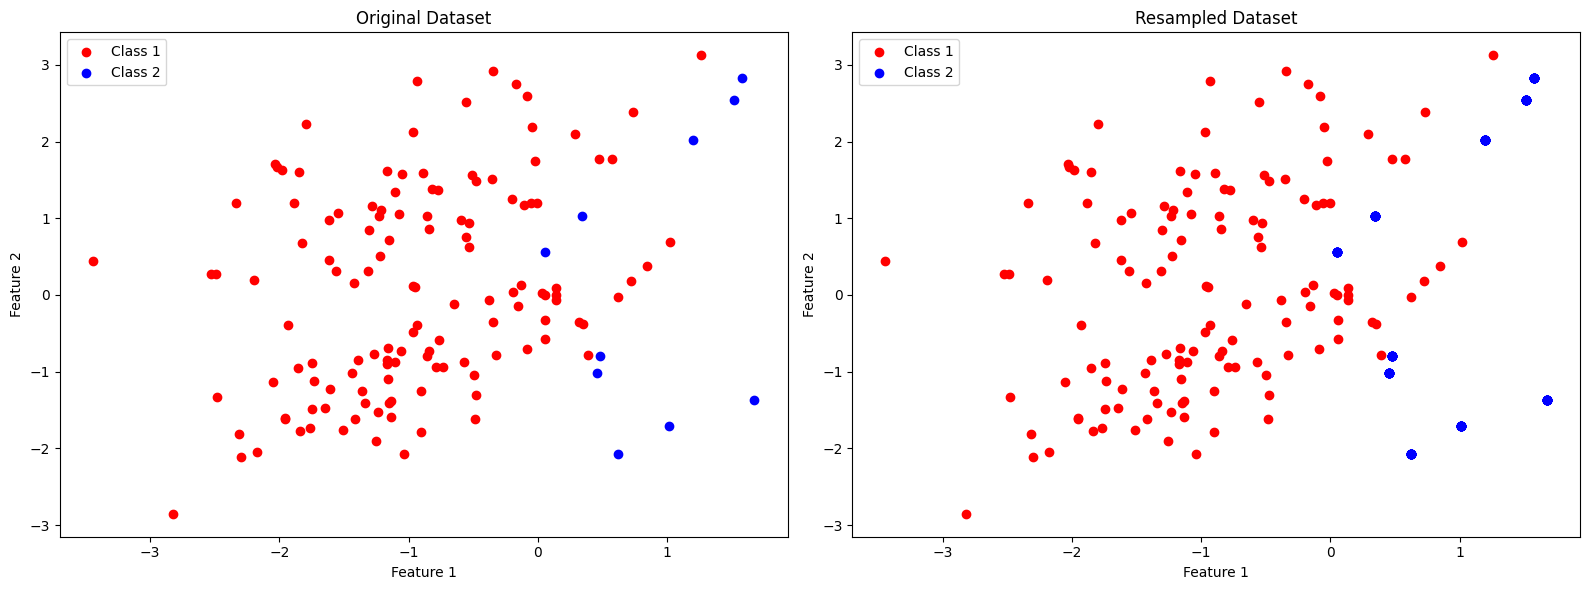

In [64]:
# Split dataset into training and testing sets
train_input, test_input, train_target, test_target = train_test_split(input_, target_, test_size = 0.3, random_state = 42)

# Applying Random Over Sampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(train_input, train_target)

# Plotting both figures side by side using subplots
plt.figure(figsize=(16, 6))

# Plotting the original dataset
plt.subplot(1, 2, 1)  # 1 row, 2 columns, position 1
plt.scatter(train_input[train_target == 0][:, 0], train_input[train_target == 0][:, 1], color='red', label='Class 1')
plt.scatter(train_input[train_target == 1][:, 0], train_input[train_target == 1][:, 1], color='blue', label='Class 2')
plt.title('Original Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Plotting the resampled dataset
plt.subplot(1, 2, 2)  # 1 row, 2 columns, position 2
plt.scatter(X_resampled[y_resampled == 0][:, 0], X_resampled[y_resampled == 0][:, 1], color='red', label='Class 1')
plt.scatter(X_resampled[y_resampled == 1][:, 0], X_resampled[y_resampled == 1][:, 1], color='blue', label='Class 2')
plt.title('Resampled Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

Classification Report (With Over-Sampling):
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        50
           1       0.71      1.00      0.83        10

    accuracy                           0.93        60
   macro avg       0.86      0.96      0.90        60
weighted avg       0.95      0.93      0.94        60

ROC AUC Score (With Over-Sampling): 0.99


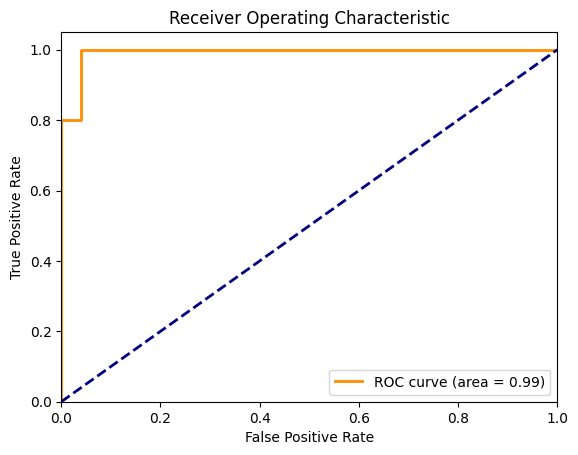

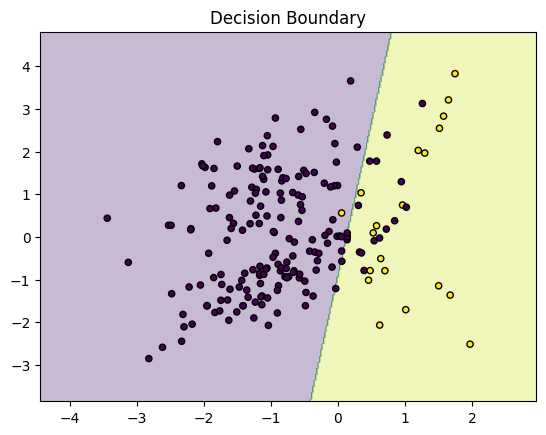

In [65]:
# Initialize and train RandomForest classifier on resampled data
classifier_ros = LogisticRegression()
classifier_ros.fit(X_resampled, y_resampled)

# Predict test set
y_pred_ros = classifier_ros.predict(test_input)
y_proba_ros = classifier_ros.predict_proba(test_input)[:, 1]

# Print classification report for resampled data
print("Classification Report (With Over-Sampling):")
print(classification_report(test_target, y_pred_ros))

# Print ROC AUC Score for resampled data
print("ROC AUC Score (With Over-Sampling):", roc_auc_score(test_target, y_proba_ros))

# Plotting ROC AUC Curve
roc_auc_curve(test_target, y_proba)

# Plot decision boundary
plot_decision_boundaries(input_, target_, classifier_ros)

**Advantages**: 
* Increases representation of minority class, preventing bias towards majority class. 
* Can improve model performance.

**Disadvantages**: 
* May lead to overfitting if synthetic samples are not well-generated. 
* Can increase computation time and memory usage.

## 1.3. Synthetic Over-Sampling Technique: SMOTE

Generate synthetic samples for the minority class by interpolating between existing instances.

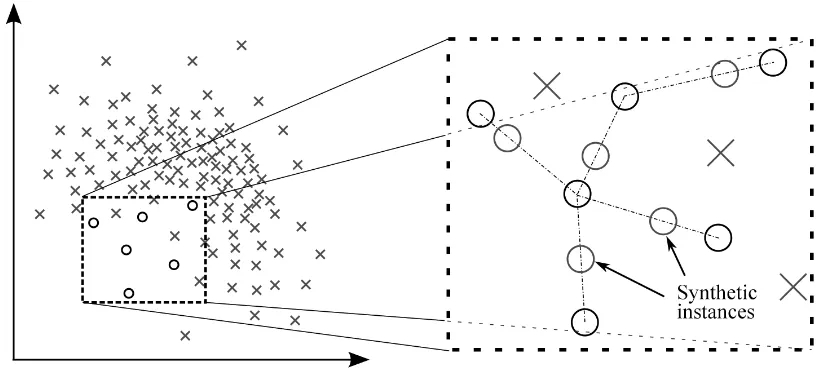

In [57]:
from imblearn.over_sampling import SMOTE

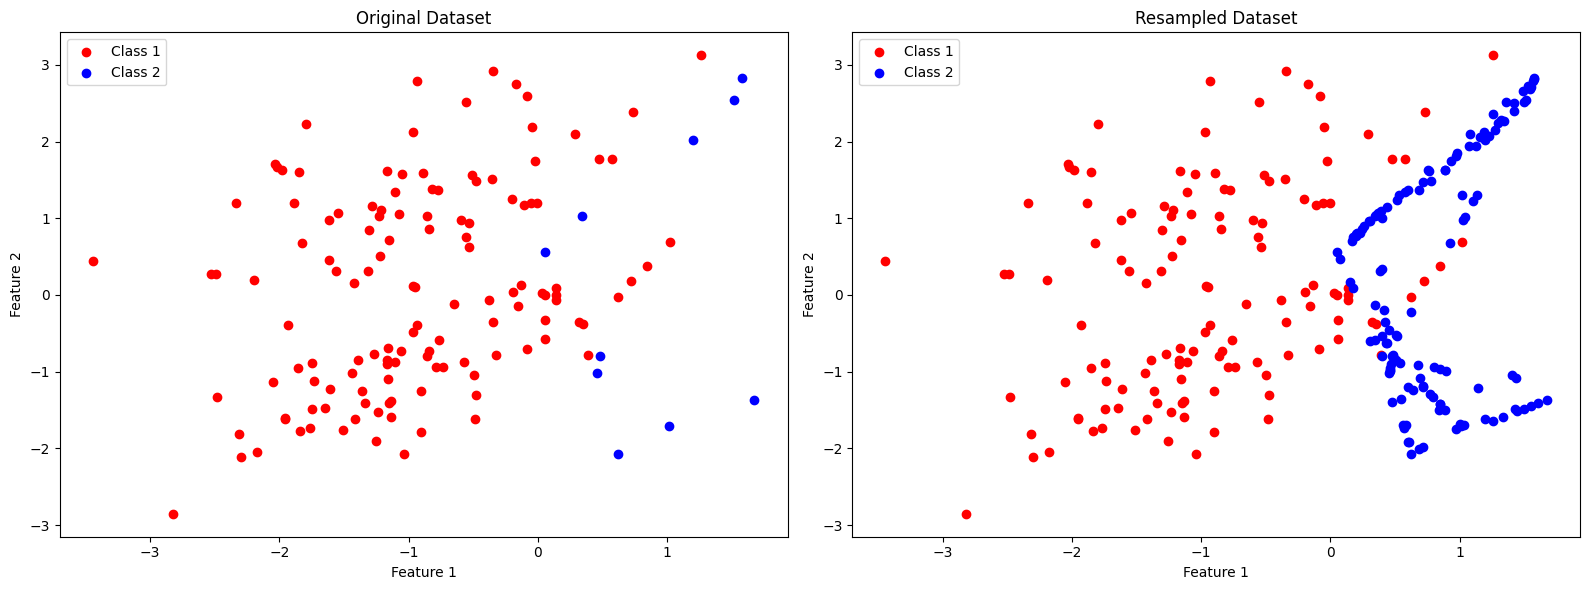

In [66]:
# Split dataset into training and testing sets
train_input, test_input, train_target, test_target = train_test_split(input_, target_, test_size = 0.3, random_state = 42)

# Applying SMOTE
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(train_input, train_target)

# Plotting both figures side by side using subplots
plt.figure(figsize=(16, 6))

# Plotting the original dataset
plt.subplot(1, 2, 1)  # 1 row, 2 columns, position 1
plt.scatter(train_input[train_target == 0][:, 0], train_input[train_target == 0][:, 1], color='red', label='Class 1')
plt.scatter(train_input[train_target == 1][:, 0], train_input[train_target == 1][:, 1], color='blue', label='Class 2')
plt.title('Original Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Plotting the resampled dataset
plt.subplot(1, 2, 2)  # 1 row, 2 columns, position 2
plt.scatter(X_resampled_smote[y_resampled_smote == 0][:, 0], X_resampled_smote[y_resampled_smote == 0][:, 1], color='red', label='Class 1')
plt.scatter(X_resampled_smote[y_resampled_smote == 1][:, 0], X_resampled_smote[y_resampled_smote == 1][:, 1], color='blue', label='Class 2')
plt.title('Resampled Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

Classification Report (SMOTE):
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        50
           1       0.71      1.00      0.83        10

    accuracy                           0.93        60
   macro avg       0.86      0.96      0.90        60
weighted avg       0.95      0.93      0.94        60

ROC AUC Score (SMOTE): 0.99


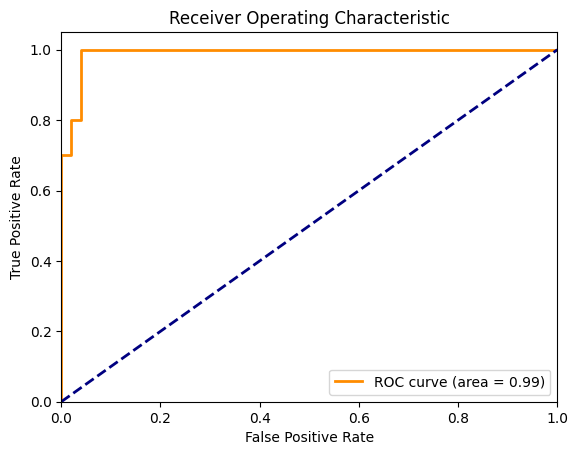

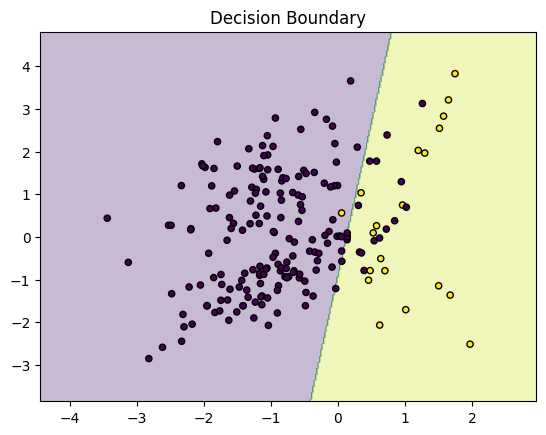

In [67]:
# Initialize and train RandomForest classifier on resampled data
classifier_smote = LogisticRegression()
classifier_smote.fit(X_resampled, y_resampled)

# Predict test set
y_pred_smote = classifier_smote.predict(test_input)
y_proba_smote = classifier_smote.predict_proba(test_input)[:, 1]

# Print classification report for resampled data
print("Classification Report (SMOTE):")
print(classification_report(test_target, y_pred_smote))

# Print ROC AUC Score for resampled data
print("ROC AUC Score (SMOTE):", roc_auc_score(test_target, y_proba_smote))

# Plotting ROC AUC Curve
roc_auc_curve(test_target, y_proba_smote)

# Plot decision boundary
plot_decision_boundaries(input_, target_, classifier_smote)

**Advantages**: 
* Generates synthetic samples, preserving minority class distribution. 
* Addresses imbalanced data without discarding information.

**Disadvantages**: 
* Can introduce noise if synthetic samples are poorly generated. 
* May not work well with high-dimensional data.
* Sensitive towards outliers.

## **2. Algorithmic Approaches:**

## 2.1. Ensemble Methods: 

Use ensemble techniques like bagging, boosting, or random forests, which are inherently robust to class imbalance.

In [60]:
from imblearn.ensemble import BalancedRandomForestClassifier

/opt/conda/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/opt/conda/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/opt/conda/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


Classification Report (SMOTE):
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        50
           1       0.71      1.00      0.83        10

    accuracy                           0.93        60
   macro avg       0.86      0.96      0.90        60
weighted avg       0.95      0.93      0.94        60

ROC AUC Score (SMOTE): 0.9770000000000001


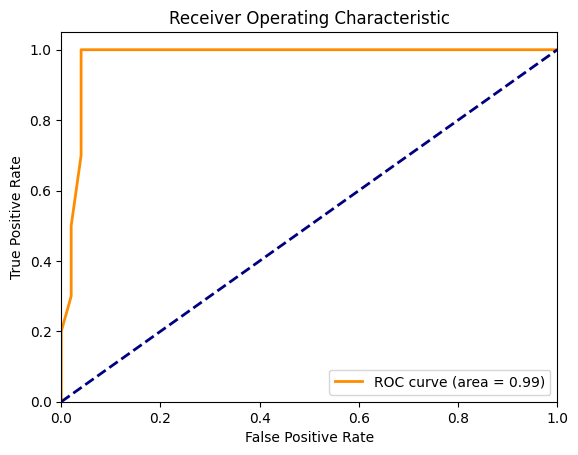

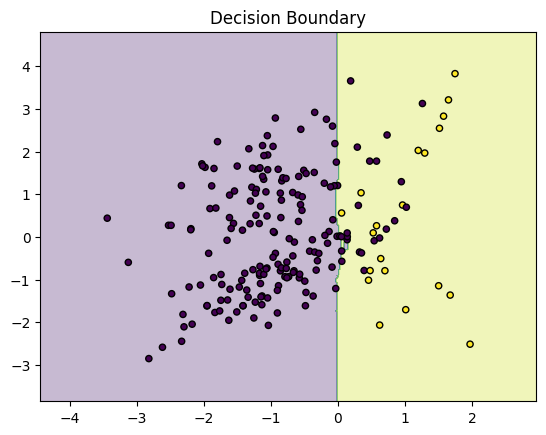

In [68]:
# Split dataset into training and testing sets
train_input, test_input, train_target, test_target = train_test_split(input_, target_, test_size = 0.3, random_state = 42)

# Initialize and train RandomForest classifier on resampled data
classifier_brf = BalancedRandomForestClassifier(random_state=42)
classifier_brf.fit(train_input, train_target)

# Predict test set
y_pred_brf = classifier_brf.predict(test_input)
y_proba_brf = classifier_brf.predict_proba(test_input)[:, 1]

# Print classification report for resampled data
print("Classification Report (SMOTE):")
print(classification_report(test_target, y_pred_brf))

# Print ROC AUC Score for resampled data
print("ROC AUC Score (SMOTE):", roc_auc_score(test_target, y_proba_brf))

# Plotting ROC AUC Curve
roc_auc_curve(test_target, y_proba_brf)

# Plot decision boundary
plot_decision_boundaries(input_, target_, classifier_brf)

**Advantages**: 
* Naturally handles class imbalance by combining multiple models. 
* Reduces risk of overfitting and improves generalization performance.

**Disadvantages**: 
* Can be computationally expensive. Requires tuning of ensemble parameters. 
* May not be effective if base classifiers are biased.


## 2.2. Cost-sensitive learning

It is an approach in machine learning where the misclassification costs of different classes are explicitly taken into account during model training. 

**Instead of treating all misclassifications equally, cost-sensitive learning assigns varying costs to different types of errors.**

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        50
           1       0.71      1.00      0.83        10

    accuracy                           0.93        60
   macro avg       0.86      0.96      0.90        60
weighted avg       0.95      0.93      0.94        60

ROC AUC Score: 0.99


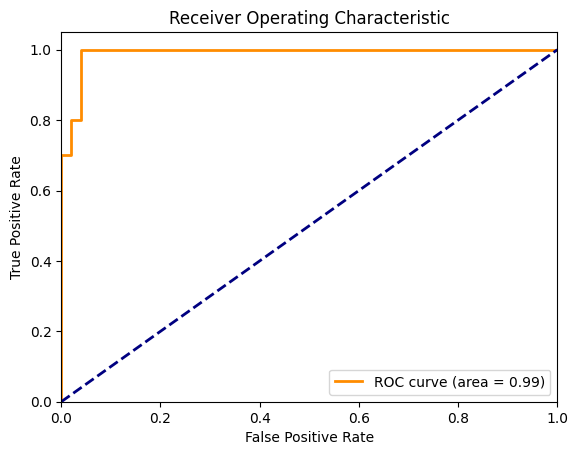

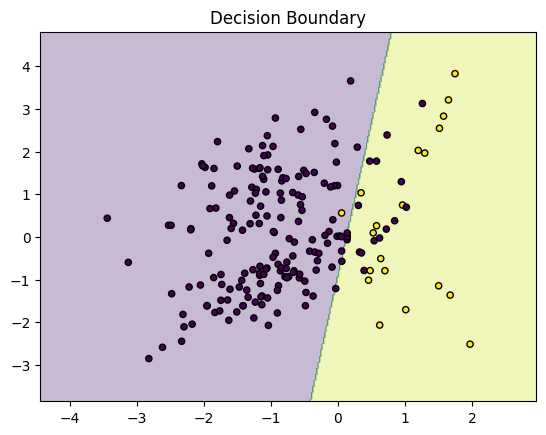

In [70]:
# Split dataset into training and testing sets
train_input, test_input, train_target, test_target = train_test_split(input_, target_, test_size = 0.3, random_state = 42)

# Initialize and train RandomForest classifier on resampled data
model = LogisticRegression()
model.fit(X_resampled, y_resampled)

# Predict test set
y_pred_model = model.predict(test_input)
y_proba_model = model.predict_proba(test_input)[:, 1]

# Print classification report for resampled data
print("Classification Report:")
print(classification_report(test_target, y_pred_model))

# Print ROC AUC Score for resampled data
print("ROC AUC Score:", roc_auc_score(test_target, y_proba_model))

# Plotting ROC AUC Curve
roc_auc_curve(test_target, y_proba_model)

# Plot decision boundary
plot_decision_boundaries(input_, target_, model)

**Advantages**: 
* Adjusts misclassification costs to account for class imbalance. 
* Improves model performance by penalizing misclassification of minority class.

**Disadvantages**: 
* Requires careful tuning of cost parameters. 
* May lead to biased predictions if costs are not properly assigned.

**Model Selection:**

Choose models that are robust to class imbalance, such as linear regression, logistic regression, decision trees, random forests, support vector machines with appropriate kernels, or anomaly detection algorithms.

## 3. Data-Level Techniques:

* **Collect More Data:** Gather additional data for the minority class to balance the dataset.
* **Domain Knowledge:** Incorporate domain knowledge to better understand the importance of different classes and guide the selection of appropriate techniques for handling imbalance.

## Evaluation Metrics:

Use evaluation metrics that are more suitable for imbalanced datasets, such as precision, recall, F1-score, area under the ROC curve (AUC-ROC), or area under the precision-recall curve (AUC-PR).

> Don't forget to **Star** this Github Repository for more such contents and consider sharing with others.